# <img src="./images/DLI_Header.png" style="width: 400px;">

# 미국 수화 데이터세트 이미지 분류

이 섹션에서는 지난 섹션에서 살펴본 데이터 준비, 모델 생성 및 모델 트레이닝 단계를 수행할 예정이며, 이번에는 지난 번과 다른 데이터세트인 [미국 수화](http://www.asl.gs/)의 수화 문자 이미지를 사용하겠습니다.

## 목표

* 트레이닝을 위한 이미지 데이터 준비
* 이미지 분류를 위한 단순 모델 생성 및 컴파일
* 이미지 분류 모델 트레이닝 및 결과 관찰

## 미국 수화 데이터세트

[미국 수화 알파벳](http://www.asl.gs/)에는 26개의 문자가 포함되어 있습니다. 이 중 두 개의 문자(j 및 z)에는 동작이 요구되므로 트레이닝 데이터세트에 포함되지 않았습니다.  

<img src="./images/asl.png" style="width: 600px;">

### Kaggle

이 데이터세트는 데이터세트와 기타 딥러닝 리소스를 찾기에 아주 좋은 웹사이트인 [Kaggle](http://www.kaggle.com)에서 제공됩니다. 노트북에서 본 데이터세트와 "커널" 등의 리소스를 제공하는 것 외에도, Kaggle은 다른 이들과 매우 정확한 모델을 트레이닝하는 경쟁을 할 수 있는 경진대회도 주관합니다.

연습을 하고 싶거나 다수의 딥러닝 프로젝트 사례를 확인하고 싶은 경우 Kaggle을 방문하면 좋습니다.

## 데이터 로드

이 데이터세트는 MNIST와 동일한 방식으로 Keras를 통해 제공되지 않으므로 맞춤형 데이터를 로드하는 방법을 알아보겠습니다. 이 섹션이 끝날 무렵에는 앞서와 같이 `x_train`, `y_train`, `x_valid` 및 `y_valid` 변수를 보유하게 됩니다.

### 데이터 읽기

수화 데이터세트는 Microsoft Excel과 Google Sheet의 기반이 되는 동일한 데이터 구조인 [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)(Comma Separated Values) 형식으로 되어 있습니다. 이는 [트레이닝](asl_data/sign_mnist_train.csv) 및 [검증](asl_data/sign_mnist_valid.csv) 데이터세트에서 보이는 것처럼 상단에 레이블이 있는 행과 열로 이루어진 그리드입니다(로드하는 데 약간의 시간이 소요될 수 있음).

데이터를 로드하여 작업하기 위해 데이터 로드 및 조작을 위한 고성능 툴인 [Pandas](https://pandas.pydata.org/)라는 라이브러리를 사용하겠습니다. CSV 파일은 [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)이라는 형식으로 읽게 됩니다.

In [1]:
import pandas as pd

Pandas에는 csv 파일을 예상하고 DataFrame을 반환하는 [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 메서드가 있습니다.

In [2]:
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

### 데이터 살펴보기

데이터를 살펴보겠습니다. [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) 메서드를 사용하여 DataFrame의 처음 행 몇 개를 출력할 수 있습니다. 각 행은 `label` 열, 그리고 MNIST 데이터세트처럼 이미지의 각 픽셀 값을 나타내는 784개의 값을 지닌 이미지입니다. 보시다시피 레이블은 현재 알파벳 문자가 아닌 숫자 값입니다.

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### 레이블 추출

MNIST와 마찬가지로, 트레이닝 및 검증 레이블을 `y_train` 및 `y_valid` 변수에 저장하려고 합니다. 여기서는 해당 변수를 생성한 다음 레이블이 더 이상 필요없는 데이터프레임 원본에서 레이블을 삭제합니다.

In [4]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

### 이미지 추출

MNIST와 마찬가지로, 트레이닝 및 검증 이미지를 `x_train` 및 `x_valid` 변수에 저장하려고 합니다. 여기서는 해당 변수를 생성합니다.

In [5]:
x_train = train_df.values
x_valid = valid_df.values

### 트레이닝 및 검증 데이터 요약

이제 트레이닝을 위한 각각 784개 픽셀을 포함하는 27,455개의 이미지와

In [6]:
x_train.shape

(27455, 784)

해당 레이블이 준비되었습니다.

In [7]:
y_train.shape

(27455,)

검증을 위해서는 7,172개의 이미지와

In [8]:
x_valid.shape

(7172, 784)

해당 레이블이 있습니다.

In [9]:
y_valid.shape

(7172,)

## 데이터 시각화

이미지를 시각화하기 위해 다시 한 번 matplotlib 라이브러리를 사용하겠습니다. 이러한 시각화의 세부적인 내용에 대해서는 걱정할 필요가 없지만 만약 관심이 있다면 나중에 [matplotlib](https://matplotlib.org/)에 대해 자세히 알아볼 수 있습니다.

이미지를 이해하기 위해서는 현재 784개 픽셀로 이루어진 1D 모양을 28x28픽셀로 이루어진 2D 모양으로 재구성해야 합니다.

In [10]:
chr(97)  # char 형으로 바꿔준다
ord('J')-97


-23

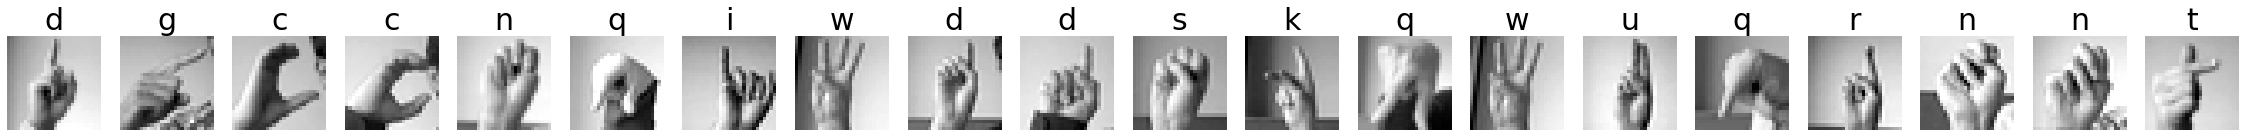

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = chr(y_train[i] + 97) if y_train[i] < 9 else chr(y_train[i] + 98)
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## 연습: 이미지 데이터 정규화

MNIST 데이터세트에서 했던 것처럼 이미지 데이터를 정규화하겠습니다. 즉, 데이터의 픽셀 값이 현재처럼 0~255가 아닌

In [12]:
x_train.min()

0

In [13]:
x_train.max()

255

0~1의 부동 소수점 값이 되어야 합니다. 다음 셀을 사용하여 작업하십시오. 문제가 생기는 경우에는 아래의 솔루션을 확인하십시오.

In [14]:
# TODO: Normalize x_train and x_valid.
# 최대값으로 나눠주면 된다.
x_train = x_train / 255
x_valid = x_valid /255

### 솔루션

아래의 '...'를 클릭하면 솔루션이 표시됩니다.

```python
x_train = x_train / 255
x_valid = x_valid / 255
```

## 연습: 레이블 분류

MNIST 데이터세트에서 했던 것처럼 레이블을 범주 인코딩하겠습니다. 이전에 했듯이 [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) 메서드를 사용하여 여기에 인코딩할 값과 값을 인코딩할 범주 수를 전달해 범주 인코딩을 수행할 수 있습니다. 아래 셀에서 작업을 수행하십시오. `keras`를 가져와 범주 수(24)를 설정해 두었습니다.

In [15]:
import tensorflow.keras as keras
num_classes = 24

In [16]:
# TODO: Categorically encode y_train and y_valid.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)


### 솔루션

아래의 '...'를 클릭하면 솔루션이 표시됩니다.

```python
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
```

## 연습: 모델 구축

데이터가 모두 준비되었고 트레이닝 및 검증을 위한 이미지를 정규화했으며 트레이닝 및 검증을 위한 레이블을 범주 인코딩했습니다.

이 연습에서는 순차 모델을 구축하겠습니다. 지난 번에 했던 대로, 다음과 같은 모델을 구축합니다.
* 밀집 입력 레이어를 지님. 이 레이어는 512개의 뉴런을 포함하고 `relu` 활성화 함수를 사용하고 `(784,)` 모양을 가진 입력 이미지를 예상해야 합니다.
* 512개의 뉴런을 포함하고 `relu` 활성화 함수를 사용하는 두 번째 밀집 레이어를 지님
* 뉴런 수가 클래스와 동일하고 `softmax` 활성화 함수를 사용하는 밀집 출력 레이어를 지님

아래 셀에서 작업을 수행해 모델을 저장할 `model` 변수를 생성하십시오. 바로 시작할 수 있도록 Keras [순차](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) 모델 클래스와 [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 레이어 클래스를 가져왔습니다. 아래 솔루션을 표시하여 힌트를 얻을 수 있습니다.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# TODO: build a model following the guidelines above.

model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))    # 첫번 쨰 레이어에만 input_shape가 필요함
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(num_classes, 'softmax'))

### 솔루션

아래의 '...'를 클릭하면 솔루션이 표시됩니다.

```python
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))
```

## 모델 요약

아래 셀을 실행하여 방금 생성한 모델을 요약하십시오.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 24)                12312     
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

전과 같은 옵션으로 모델을 [컴파일](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile)하며, [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)를 사용하여 다수의 범주 중 하나에 맞추고 싶다는 사실을 반영하고 모델의 정확도를 측정하겠습니다.

In [20]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## 연습: 모델 트레이닝

모델의 `fit` 메서드를 사용하여 위에서 생성한 트레이닝 및 검증 이미지와 레이블로 20에포크 동안 트레이닝하십시오.

In [21]:
# TODO: Train the model for 20 epochs.
model.fit(x_train, y_train, epochs=20, verbose=2, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 - 2s - loss: 1.9293 - accuracy: 0.3927 - val_loss: 1.8609 - val_accuracy: 0.4225
Epoch 2/20
858/858 - 2s - loss: 0.9319 - accuracy: 0.6864 - val_loss: 0.8892 - val_accuracy: 0.7032
Epoch 3/20
858/858 - 2s - loss: 0.5704 - accuracy: 0.8082 - val_loss: 1.0188 - val_accuracy: 0.7107
Epoch 4/20
858/858 - 2s - loss: 0.3763 - accuracy: 0.8783 - val_loss: 1.7762 - val_accuracy: 0.5890
Epoch 5/20
858/858 - 2s - loss: 0.2845 - accuracy: 0.9127 - val_loss: 0.8201 - val_accuracy: 0.8137
Epoch 6/20
858/858 - 2s - loss: 0.2297 - accuracy: 0.9348 - val_loss: 0.7422 - val_accuracy: 0.8210
Epoch 7/20
858/858 - 2s - loss: 0.2138 - accuracy: 0.9456 - val_loss: 0.9217 - val_accuracy: 0.8318
Epoch 8/20
858/858 - 2s - loss: 0.1972 - accuracy: 0.9517 - val_loss: 1.1064 - val_accuracy: 0.8137
Epoch 9/20
858/858 - 2s - loss: 0.1823 - accuracy: 0.9595 - val_loss: 0.9279 - val_accuracy: 0.8161
Epoch 10/20
858/858 - 2s - loss: 0.1593 - accuracy: 0.9632 - val_loss: 1.0383 - val_accuracy: 0.8447

### 솔루션

아래의 '...'를 클릭하면 솔루션이 표시됩니다.

```python
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))
```

## 논의: 어떻게 됐습니까?

트레이닝 정확도는 꽤 높은 수준에 도달했지만 검증 정확도는 그 정도로 높지 않다는 사실을 확인할 수 있습니다. 어떻게 된 걸까요?

아래의 '...'을 클릭하여 정답을 표시하기 전에 잠시 생각해 보십시오.

이는 트레이닝 데이터 분류를 위한 모델 학습의 예시이지만 아직 트레이닝되지 않은 새 데이터에 대한 성능은 저조합니다. 근본적으로는 데이터세트를 기억하지만 문제에 대한 확고하고 전반적인 이해도는 얻지 못하고 있습니다. 이는 *과적합*이라 불리는 일반적이 문제입니다. 다음 두 개의 강의에서는 과적합, 그리고 이를 해결할 수 있는 몇 가지 방법에 대해 설명하겠습니다.

## 요약

이 섹션에서는 직접 뉴럴 네트워크를 구축하여 상당히 정확한 이미지 분류를 수행해 보았습니다. 축하합니다!

이제 데이터(레이블 포함)를 로드하고 준비하고 모델을 생성한 다음 준비한 데이터로 모델을 트레이닝하는 과정이 어느 정도는 익숙해졌을 것입니다.

### 메모리 지우기
넘어가기 전에 다음 셀을 실행하여 GPU 메모리를 지워주시기 바랍니다. 이는 다음 노트북으로 넘어가기 위한 필수 작업입니다.

In [1]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## 다음

아주 기본적이지만 어느 정도는 효과적인 모델을 구성해 보았으니 이제 *CNN(Convolutional Neural Network)*을 비롯한 좀 더 복잡한 모델에 대해 알아보겠습니다.

이어서 다음 섹션인 [*ASL과 CNN*](./03_asl_cnn.ipynb)을 진행해 주시기 바랍니다.